# Backtesting with [BT](https://pmorissette.github.io/bt/#what-is-bt)

In [35]:
import bt
import matplotlib
%matplotlib inline

In [36]:
# Get prices from Yahoo Finance
data = bt.get('spy,agg', start='2010-01-01')
data.tail()

,spy,agg
Date,,
2022-04-07,448.769989,105.260002
2022-04-08,447.570007,104.730003
2022-04-11,439.920013,104.279999
2022-04-12,438.290009,104.610001
2022-04-13,443.309998,104.820000


In [37]:
# Create the BT strategy with Quarterly rebalancing and specified asset weights
# For the list of available strategies see BT documentation)
s = bt.Strategy('s1', [bt.algos.RunQuarterly(),
                       bt.algos.SelectAll(),
                       bt.algos.WeighSpecified(spy=0.6,agg=0.4),
                       bt.algos.Rebalance()])

In [38]:
# Create a backtest and run it
test = bt.Backtest(s, data)
res = bt.run(test)

<AxesSubplot:title={'center':'Fixed Weighted Portfolio 60/40 - Q Rebalance'}>

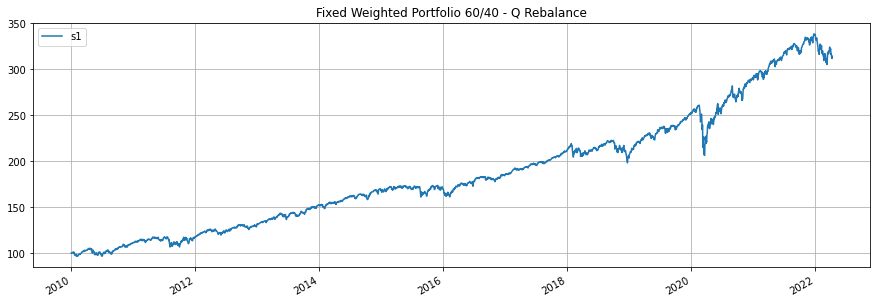

In [39]:
# Plot results
res.plot(grid=True, title='Fixed Weighted Portfolio 60/40 - Q Rebalance')

In [40]:
# Display lookback returns
res.display_lookback_returns()

,s1
mtd,-1.90%
3m,-5.24%
6m,-1.58%
ytd,-6.88%
1y,2.43%
3y,11.23%
5y,10.50%
10y,9.73%
incep,9.77%


In [41]:
# Display monthly returns from backtest
res.display_monthly_returns(backtest='s1')

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2010  -2.63   1.9    3.59   1.32  -4.33  -2.24   4.46  -2.27   5.38   2.36  -0.33   3.81  11
  2011   1.39   2.21  -0.08   2.37  -0.18  -1.19  -0.52  -2.6   -3.63   6.89  -0.38   1.16   5.16
  2012   3.12   2.62   1.76  -0.02  -3.13   2.33   1.25   1.5    1.64  -1.11   0.45   0.43  11.22
  2013   2.8    1.01   2.35   1.53   0.63  -1.42   3.21  -2.15   2.36   3.11   1.7    1.38  17.63
  2014  -1.53   2.84   0.44   0.75   1.86   1.22  -0.9    2.81  -1.08   1.85   1.93  -0.1   10.45
  2015  -0.96   2.94  -0.8    0.46   0.6   -1.66   1.71  -3.8   -1.16   5.12   0.08  -1.15   1.1
  2016  -2.53   0.32   4.3    0.34   1.02   0.98   2.41  -0.01   0.02  -1.37   1.17   1.34   8.12
  2017   1.17   2.62   0.05   0.95   1.12   0.38   1.37   0.55   0.98   1.45   1.79   0.93  14.19
  2018   2.93  -2.62  -1

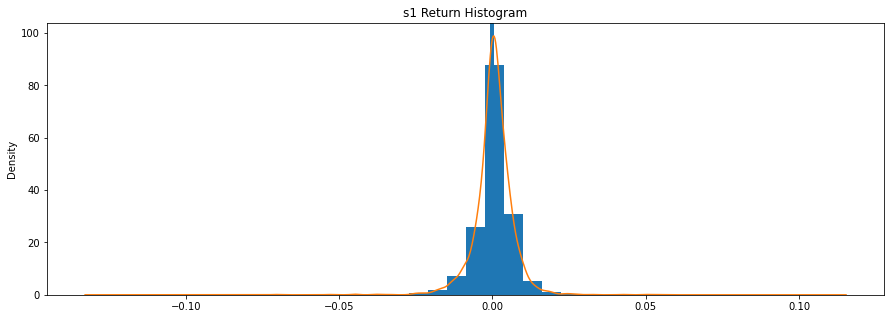

In [42]:
# Display strategy histogram
res.plot_histogram()

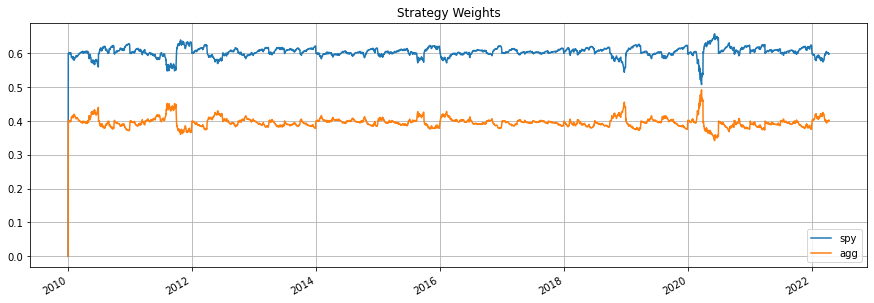

In [45]:
# Plot the security weights over time
res.plot_security_weights(grid=True, title='Strategy Weights')

In [44]:
# Print strategy stats (set risk-free rate)
res.set_riskfree_rate(0.01)
res.display()

Stat                 s1
-------------------  ----------
Start                2010-01-03
End                  2022-04-13
Risk-free rate       1.00%

Total Return         214.05%
Daily Sharpe         0.88
Daily Sortino        1.35
CAGR                 9.77%
Max Drawdown         -20.94%
Calmar Ratio         0.47

MTD                  -1.90%
3m                   -5.24%
6m                   -1.58%
YTD                  -6.88%
1Y                   2.43%
3Y (ann.)            11.23%
5Y (ann.)            10.50%
10Y (ann.)           9.73%
Since Incep. (ann.)  9.77%

Daily Sharpe         0.88
Daily Sortino        1.35
Daily Mean (ann.)    9.83%
Daily Vol (ann.)     10.01%
Daily Skew           -0.80
Daily Kurt           14.26
Best Day             5.33%
Worst Day            -7.08%

Monthly Sharpe       1.07
Monthly Sortino      2.05
Monthly Mean (ann.)  9.94%
Monthly Vol (ann.)   8.32%
Monthly Skew         -0.16
Monthly Kurt         1.16
Best Month           8.75%
Worst Month          -7.34%

Yearly